In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp



In [23]:

# Variables symboliques
w1, w2, x1, x2, y = sp.symbols('w1 w2 x1 x2 y', real=True)

# Vecteurs
w = sp.Matrix([w1, w2])
x = sp.Matrix([x1, x2])

# --- MSE (pour une seule observation) ---
y_pred = w.dot(x)
mse_expr = (y_pred - y)**2
grad_mse = sp.Matrix([sp.diff(mse_expr, w1), sp.diff(mse_expr, w2)])

print("Gradient MSE =", grad_mse)

# --- Log-loss (classification binaire, sigmoid) ---
z = w.dot(x)
sigma = 1/(1+sp.exp(-z))
log_loss = -(y*sp.log(sigma) + (1-y)*sp.log(1-sigma))
grad_log = sp.Matrix([sp.diff(log_loss, w1), sp.diff(log_loss, w2)])

print("Gradient log-loss =", grad_log)


Gradient MSE = Matrix([[2*x1*(w1*x1 + w2*x2 - y)], [2*x2*(w1*x1 + w2*x2 - y)]])
Gradient log-loss = Matrix([[-x1*y*exp(-w1*x1 - w2*x2)/(exp(-w1*x1 - w2*x2) + 1) + x1*(1 - y)*exp(-w1*x1 - w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**2)], [-x2*y*exp(-w1*x1 - w2*x2)/(exp(-w1*x1 - w2*x2) + 1) + x2*(1 - y)*exp(-w1*x1 - w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**2)]])


In [24]:
# Hessienne pour MSE
H_mse = sp.hessian(mse_expr, (w1, w2))
print("Hessienne MSE =", H_mse)

# Hessienne pour log-loss
H_log = sp.hessian(log_loss, (w1, w2))
print("Hessienne Log-loss =", H_log)


Hessienne MSE = Matrix([[2*x1**2, 2*x1*x2], [2*x1*x2, 2*x2**2]])
Hessienne Log-loss = Matrix([[x1**2*y*exp(-w1*x1 - w2*x2)/(exp(-w1*x1 - w2*x2) + 1) - x1**2*y*exp(-2*w1*x1 - 2*w2*x2)/(exp(-w1*x1 - w2*x2) + 1)**2 - x1**2*(1 - y)*exp(-w1*x1 - w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**2) + 2*x1**2*(1 - y)*exp(-2*w1*x1 - 2*w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**3) + x1**2*(1 - y)*exp(-2*w1*x1 - 2*w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))**2*(exp(-w1*x1 - w2*x2) + 1)**4), x1*x2*y*exp(-w1*x1 - w2*x2)/(exp(-w1*x1 - w2*x2) + 1) - x1*x2*y*exp(-2*w1*x1 - 2*w2*x2)/(exp(-w1*x1 - w2*x2) + 1)**2 - x1*x2*(1 - y)*exp(-w1*x1 - w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**2) + 2*x1*x2*(1 - y)*exp(-2*w1*x1 - 2*w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))*(exp(-w1*x1 - w2*x2) + 1)**3) + x1*x2*(1 - y)*exp(-2*w1*x1 - 2*w2*x2)/((1 - 1/(exp(-w1*x1 - w2*x2) + 1))**2*(exp(-w1*x1 - w2*x2) + 1)**4)], [x1*x2*y*exp(-w1*x1 - w2*x2)/(exp(-w

In [ ]:

IRIS_PATH  = "./data/iris/iris.data"
WINE_PATH  = "./data/wine+quality/winequality-red.csv"
SAMPLE_SIZE = 80   

#  Chargement des datasets

iris = pd.read_csv(IRIS_PATH, header=None)
iris.columns = ["sepal_length","sepal_width","petal_length","petal_width","class"]
iris_bin = iris[iris["class"].isin(["Iris-setosa","Iris-versicolor"])].copy()
X_clf_full = iris_bin[["sepal_length","sepal_width"]].values
y_clf_full = (iris_bin["class"] == "Iris-versicolor").astype(int).values

wine = pd.read_csv(WINE_PATH, sep=";")
X_reg_full = wine[["alcohol","sulphates"]].values
y_reg_full = wine["quality"].values

# échantillonnage max 100
rng = np.random.default_rng(0)
idx_reg = rng.choice(len(X_reg_full), min(SAMPLE_SIZE, len(X_reg_full)), replace=False)
idx_clf = rng.choice(len(X_clf_full), min(SAMPLE_SIZE, len(X_clf_full)), replace=False)

X_reg, y_reg = X_reg_full[idx_reg], y_reg_full[idx_reg]
X_clf, y_clf = X_clf_full[idx_clf], y_clf_full[idx_clf]

print("Wine regression sample:", X_reg.shape)
print("Iris classification sample:", X_clf.shape)


In [17]:

# Fonctions de perte

def mse_loss(w_vec):
    w = np.asarray(w_vec).reshape(2,)
    preds = X_reg @ w
    return np.mean((preds - y_reg)**2)

def mse_grad_num(w_vec):
    w = np.asarray(w_vec).reshape(2,)
    preds = X_reg @ w
    return (2.0/len(y_reg)) * (X_reg.T @ (preds - y_reg))

def logistic_loss(w_vec):
    w = np.asarray(w_vec).reshape(2,)
    z = X_clf @ w
    s = 1.0/(1.0 + np.exp(-z))
    eps = 1e-12
    return -np.mean(y_clf*np.log(s+eps) + (1-y_clf)*np.log(1-s+eps))

def logistic_grad_num(w_vec):
    w = np.asarray(w_vec).reshape(2,)
    z = X_clf @ w
    s = 1.0/(1.0 + np.exp(-z))
    return (1.0/len(y_clf)) * (X_clf.T @ (s - y_clf))


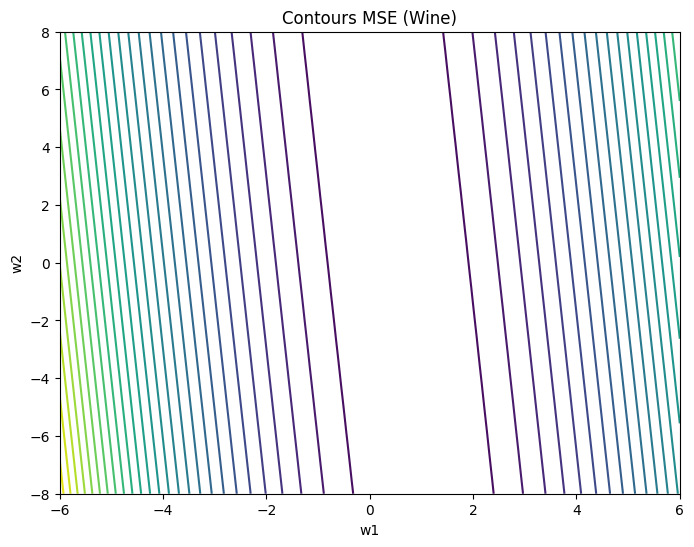

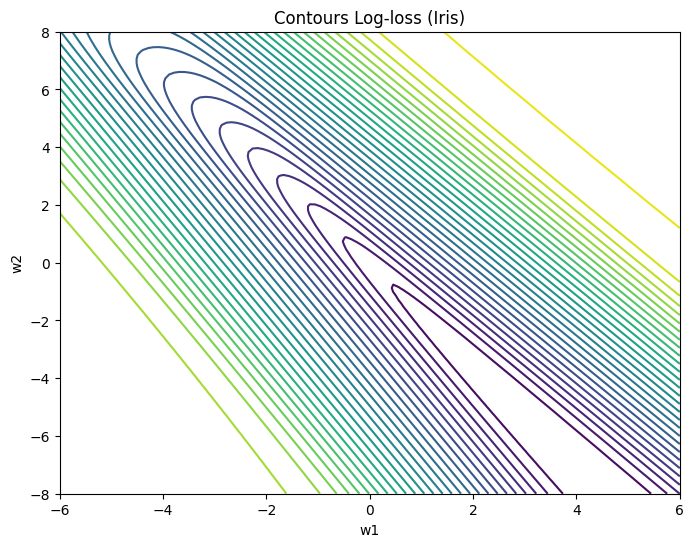

In [18]:

#  Contours des fonctions 

w1_vals = np.linspace(-6,6,120)
w2_vals = np.linspace(-8,8,120)
W1,W2 = np.meshgrid(w1_vals, w2_vals)
Z_mse = np.zeros_like(W1)
Z_log = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        wtmp = np.array([W1[i,j], W2[i,j]])
        Z_mse[i,j] = mse_loss(wtmp)
        Z_log[i,j] = logistic_loss(wtmp)

plt.figure(figsize=(8,6))
plt.contour(W1,W2,Z_mse,levels=30)
plt.title("Contours MSE (Wine)")
plt.xlabel("w1"); plt.ylabel("w2")
plt.show()

plt.figure(figsize=(8,6))
plt.contour(W1,W2,Z_log,levels=30)
plt.title("Contours Log-loss (Iris)")
plt.xlabel("w1"); plt.ylabel("w2")
plt.show()


In [19]:

# Calcul de w* et ellipse

XtX = X_reg.T @ X_reg
if np.linalg.matrix_rank(XtX) < 2:
    lam = 1e-6
    w_star = np.linalg.inv(XtX + lam*np.eye(2)) @ (X_reg.T @ y_reg)
else:
    w_star = np.linalg.inv(XtX) @ (X_reg.T @ y_reg)

H = (2.0/len(y_reg)) * XtX  # Hessienne
print("w* =", w_star)
print("H =\n", H)

# ellipse : (w-w*)^T H (w-w*) = c
c = 0.5
eigvals, eigvecs = np.linalg.eigh(H)
a = np.sqrt(c / eigvals[0])
b = np.sqrt(c / eigvals[1])

thetas = np.linspace(0, 2*np.pi, 400)
ellipse_pts = np.array([ w_star + eigvecs @ np.array([a*np.cos(t), b*np.sin(t)]) for t in thetas ])


w* = [0.402266 2.361012]
H =
 [[214.256278  13.149858]
 [ 13.149858   0.833015]]


In [20]:

#  Choix du point et tangente

if w_point_given is not None:
    w_point = np.array(w_point_given)
else:
    theta0 = np.pi/4
    u0 = np.array([a*np.cos(theta0), b*np.sin(theta0)])
    w_point = w_star + eigvecs @ u0

grad_at_point = 2.0 * H @ (w_point - w_star)
gx, gy = grad_at_point
x0, y0 = w_point

if abs(gy) > 1e-12:
    slope = -gx / gy
    intercept = y0 - slope * x0
    tangent_eq = f"y = {intercept:.4f} + ({slope:.4f}) x"
else:
    tangent_eq = f"x = {x0:.4f}"

print("Point choisi :", w_point)
print("Equation de la tangente :", tangent_eq)


Point choisi : [ 0.558756 -0.744939]
Equation de la tangente : y = 6.9733 + (-13.8132) x


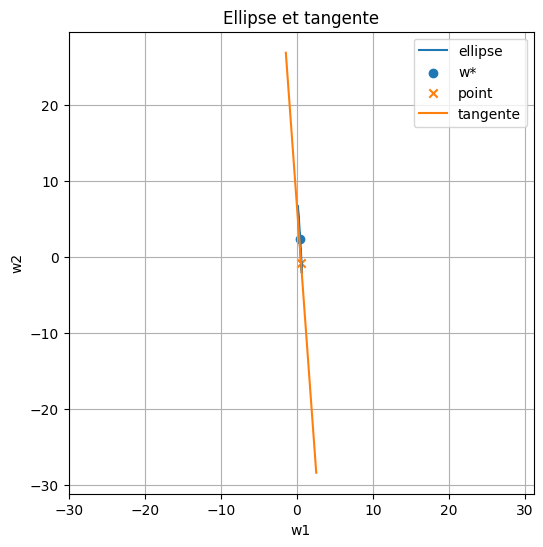

In [21]:
#visualisation du tracer
plt.figure(figsize=(6,6))
plt.plot(ellipse_pts[:,0], ellipse_pts[:,1], label="ellipse")
plt.scatter([w_star[0]],[w_star[1]], marker='o', label="w*")
plt.scatter([w_point[0]],[w_point[1]], marker='x', label="point")

if "y =" in tangent_eq:
    xs = np.linspace(w_point[0]-2, w_point[0]+2, 200)
    ys = slope * xs + intercept
    plt.plot(xs, ys, label="tangente")
else:
    plt.axvline(x=x0, label="tangente")

plt.xlabel("w1"); plt.ylabel("w2")
plt.legend(); plt.grid(True); plt.axis('equal')
plt.title("Ellipse et tangente")
plt.show()
